In [1]:
temperatures=read.table("../datasets/avtemp.csv", TRUE, sep=",")
colnames(temperatures)

[1] "year"     "tempdiff"

In [2]:
head(temperatures)

year,tempdiff
1880,-0.19
1881,-0.10
1882,-0.10
1883,-0.19
1884,-0.28
1885,-0.31


In [3]:
sum(subset(temperatures,year>1950 & year <= 1980)[2])/
(1980-1950)

[1] 2.312965e-19

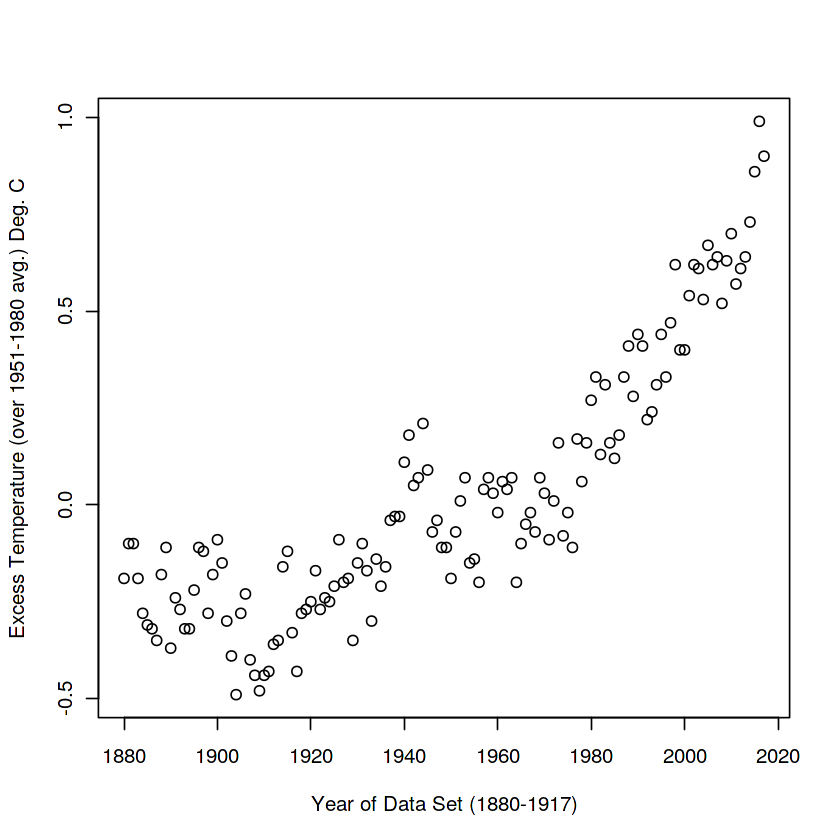

In [4]:
years=temperatures$year
temps=temperatures$tempdiff
plot(years,temps, xlab="Year of Data Set (1880-1917)",
ylab="Excess Temperature (over 1951-1980 avg.) Deg. C")

In [5]:
n = nrow(temperatures)
index = sample(1:n,round(0.75*n))
print(n)
print(index)

[1] 138
  [1]  61  42 109  44  19  50 105  47  14  18 126  68  87  72  39  28  99  73
 [19]  24  27  20 110  83 123   7  31 104  67 136  46  52  81 106  59  12  13
 [37]  57 120 107 114  95  34 101 119   5  92  54  45  40  77 132  22  32 128
 [55] 130  63 131  88  23   9  78  64  58  89 122  82  55  26 129  29  37  56
 [73]  36  74  15  85 134  96  62  53  48  80 115 137 108 121   4  76  51  84
 [91]  90 124  25  11   2  43  49  33   6  86  38  71   1  66


In [6]:
train=temperatures[index,]
test=temperatures[-index,]

In [7]:
head(train)

,year,tempdiff
61,1940,0.11
42,1921,-0.17
109,1988,0.41
44,1923,-0.24
19,1898,-0.28
50,1929,-0.35


In [8]:
head(test)

,year,tempdiff
3,1882,-0.10
8,1887,-0.35
10,1889,-0.11
16,1895,-0.22
17,1896,-0.11
21,1900,-0.09


In [9]:
lm.fit = lm(tempdiff~year, data=train)

In [10]:
lm.fit


Call:
lm(formula = tempdiff ~ year, data = train)

Coefficients:
(Intercept)         year  
 -14.222535     0.007307  


In [11]:
summary(lm.fit)


Call:
lm(formula = tempdiff ~ year, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32868 -0.10813 -0.03117  0.10681  0.48135 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.422e+01  7.953e-01  -17.88   <2e-16 ***
year         7.307e-03  4.088e-04   17.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1616 on 102 degrees of freedom
Multiple R-squared:  0.758,	Adjusted R-squared:  0.7557 
F-statistic: 319.5 on 1 and 102 DF,  p-value: < 2.2e-16


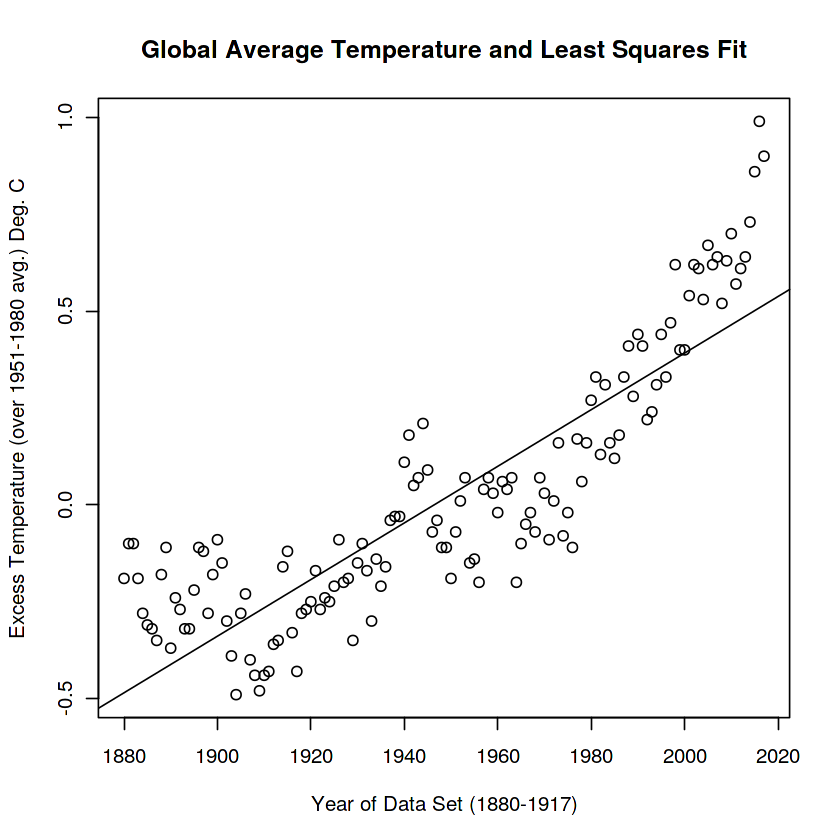

In [12]:
plot(years,temps, xlab="Year of Data Set (1880-1917)",
ylab="Excess Temperature (over 1951-1980 avg.) Deg. C",
main="Global Average Temperature and Least Squares Fit")
abline(lm.fit)

In [13]:
ypredicted=predict(lm.fit,test)

In [14]:
head(ypredicted)

3          8         10         16         17         21 
-0.4705084 -0.4339728 -0.4193585 -0.3755157 -0.3682086 -0.3389800

In [15]:
yobserved=test$tempdiff # $ selects a column
ypredicted=predict(lm.fit,test)
sum((ypredicted-yobserved)^2)/nrow(test)

[1] 0.03180587